# MA124 Maths by Computer: Assignment 2

Student number: 2102404 

# Introduction
This notebook is based on an article [1] which aims to predict required number of rental bikes required at each hour in order to make a bike sharing system consistently work; the motivation behind it is the constant increase in the number of users of these bike systems. To make the prediction, data regarding bike rentals in Seoul is used, which includes weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

In this notebook we apply machine learning to the original dataset using a linear regression model with a 25% to 75% split, then a decision tree regression. We will also use the metrics Coefficient of Variation (R^2), Mean Absolute Error (MAE), Coefficient of Variation (CV) and Root Mean Squared Error (RMSE) to see how accuarate the model is in comparison to the true values of the data set. 

[1] Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for bike sharing demand prediction in metropolitan city.' Computer Communications, Vol.153, pp.353-366, March, 2020. [web link](https://doi.org/10.1016/j.comcom.2020.02.007).


In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor



# Description of the data

This table below displays various properties of each factor in the data set: the mean, the standard deviation, the maximum and minumum values and the 25th, 50th & 75th percentiles.

In [2]:
bikes = pd.read_csv('SeoulBikeData_mod.csv')
bikes.describe()


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month
count,4416.000000,4416.00000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000
mean,704.591259,11.50000,13.203986,59.257246,1.653193,1398.641304,4.723958,0.560181,0.139312,0.070879,5.956522
std,637.407244,6.92297,11.529724,20.162981,0.976361,621.560536,12.671445,0.860496,1.145271,0.437416,3.407262
min,0.000000,0.00000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000
25%,189.000000,5.75000,4.500000,44.000000,0.900000,853.000000,-3.500000,0.000000,0.000000,0.000000,3.000000
50%,542.000000,11.50000,14.300000,58.000000,1.500000,1621.000000,6.400000,0.010000,0.000000,0.000000,5.000000
75%,1047.000000,17.25000,22.200000,75.000000,2.200000,1999.000000,14.900000,0.910000,0.000000,0.000000,9.000000
max,3298.000000,23.00000,38.000000,98.000000,6.700000,2000.000000,26.800000,3.520000,35.000000,8.800000,11.000000


# Rented Bike Count Distribution

The figures below are a boxplot and histogram showing the distribution of hourly rented bike counts. There is a long tail in the data distribution, suggesting data points towards the end of the tail can be regarded as anomalies.

The histogram plot shows the frequency of rented bike counts in ranges of 100. The most common amount of bikes rented in an hour is between 0 and 100, which occurs roughly 650 times in the data set. Bike counts above 2500 are very unlikely to occur, and the counts of over 3000 might be explained by unusually optimal conditions, or other factors outside the scope of the data given.

The box plot shows the average rented bike count, shown by an orange line, to be between 500 and 600 bikes rented each hour. The upper whisker takes the value of approximately 2300, and the plot determines that counts of above this are anomalies, displayed as circles in the figure. The value of the lower whisker is 0.


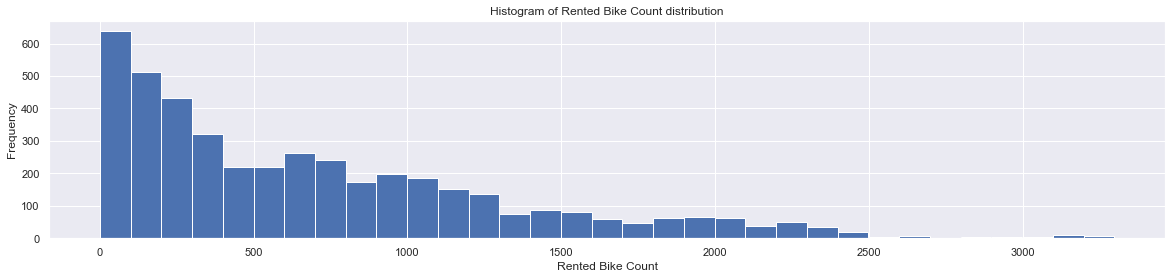

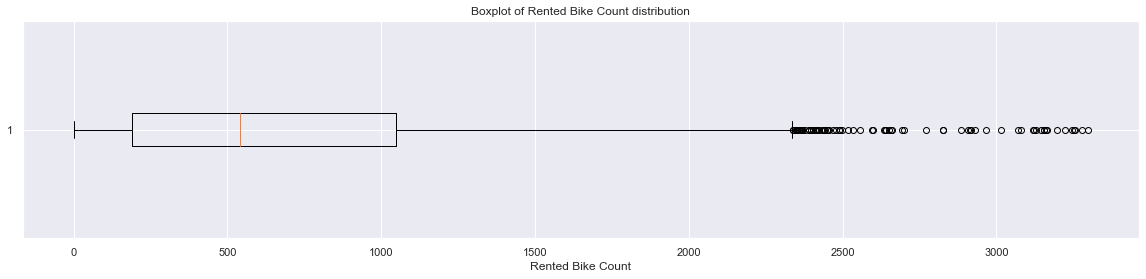

In [12]:
# plot histogram and box plot showing rented bike count distribution

plt.hist(bikes['Rented Bike Count'], bins=33, label='')

plt.xlabel("Rented Bike Count")
plt.ylabel("Frequency")
plt.title("Histogram of Rented Bike Count distribution")
plt.tick_params(axis='x')  
plt.tick_params(axis='y')
plt.show()

plt.boxplot(bikes['Rented Bike Count'], notch=None, vert=0)
plt.tick_params(axis='x') 
plt.title("Boxplot of Rented Bike Count distribution")
plt.xlabel("Rented Bike Count")
plt.show()



# Violin Plots of Rented Bike Count

The violin plots below show the distibution of rented bike count by hour and by month. The dashed lines show the upper and lower quartiles, whilst the long-dashed lines show the median rented bike count for each hour/month. 

From the first figure we can see that late at night, specifically between 11am and 7am, bike rentals are much less likely to occur, with the median rented bike count being around or below 500 for each of these hours. This could correlate with people commonly sleeping around these times, the temperature being lower and reduced visibility and sunlight, which could be investigated further. Conversely, bike rentals appear to be much more common in the afternoon, between around 4pm and 10pm, and at 8am, as shown by the medians for these times being around or above 1000. 6pm and 8pm are the times at which the median for rental bike count is highest, perhaps correlating with people travelling to and from work. However, the ranges and interquartile ranges for hours later in day are a lot higher, meaning at these times there is a lot more variance in the bike count. Whilst the small interquartile ranges at 4am and 5am suggest the lower bike count at these times may be more strongly correlated with the hour, later in the day the large ranges suggest the influence of other factors.  

The second plot displays the distribution of rented bike count for every other month of the year, with January corresponding to 1, March to 3, May to 5, July to 7, September to 9 and November to 11. Months with lower median rented bike counts are 1,3 and 11, which most likely corresponds to the temperature being lower at these times of the year. Months 5, 7 and 9 all have a similar median bike count, likely corresponding to warmer temperatures and longer daylight hours. However these months once again have large ranges of counts, suggesting more of an influence from other factors.


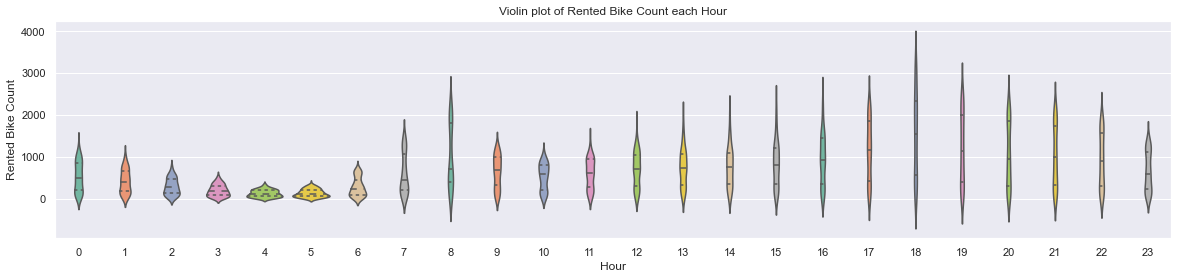

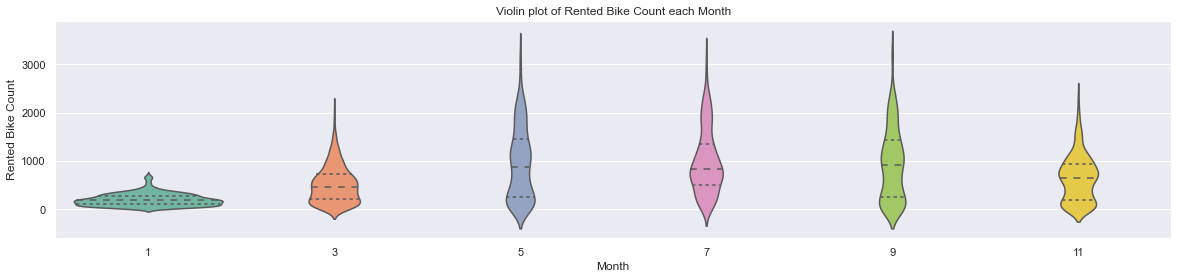

In [4]:
sns.set(rc = {'figure.figsize':(20,4)})
sns.violinplot(x='Hour', y='Rented Bike Count', data=bikes, inner='quartile',palette="Set2")
plt.title("Violin plot of Rented Bike Count each Hour")
plt.show()
sns.violinplot(x='Month', y='Rented Bike Count', data=bikes, inner='quartile',palette="Set2")
plt.title("Violin plot of Rented Bike Count each Month")
plt.show()

# Linear Regression Model

Now we train a linear regression model to predict values for rented bike count, using a 25% test, 75% train split.

The performance metrics below are scalar measures of how well the true values and the model's predited values for rental bike count agree.
They are very similar to the values in the original article, which had:

RMSE = 427.71

MAE = 322.32

CV = 61.03

R^2 = 0.55

The first three values are lower than those given below, likely due to the dataset used in the original article being much larger, so giving less error in predictions. The value for r^2 is 0.55, higher than 0.47, which also suggests the model in the article is more accurate. 



In [5]:
# Define the design matrix, X, and target, y, & split the samples with a test size of 25%
X = bikes.drop(['Rented Bike Count'], axis=1)
y = bikes['Rented Bike Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Create & train linear regression object
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

# Use the model to predict the test data & form the residual
y_pred = regr.predict(X_test)
resid = y_test - y_pred

# Compute root mean squared error
RMSE = np.sqrt(np.mean(resid**2))
print("Root mean squared error is",RMSE)

# Compute mean absolute error 
MAE = np.mean(np.abs(resid))
print("Mean absolute error is", MAE)

# Compute coefficient of variation
CV = 100 * RMSE/np.mean(y_test)
print("Coefficient of variation is",round(CV),"%")

# Compute the coefficient of determination
r2 = r2_score(y_test, y_pred)
print("R^2 is equal to",r2)

Root mean squared error is 473.08265178215373
Mean absolute error is 345.23815183016205
Coefficient of variation is 65 %
R^2 is equal to 0.4789011728091719


The histogram plot below shows how the predicted values from the model vary from the true (test) values. We can see that the prediction is not very good for the lowest values of count and has predicted some negative values for count, which suggests the model needs to be adjusted. However, the accuracy does increase for the higher counts.

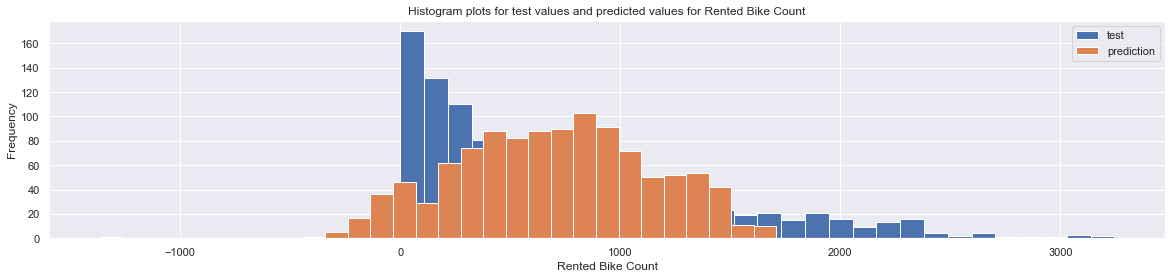

In [6]:
# plot historgrams for y_test and y_pred
plt.hist(y_test, bins=30, label='test')
plt.hist(y_pred, bins=30, label='prediction')
plt.xlabel('Rented Bike Count') 
plt.ylabel('Frequency') 
plt.title("Histogram plots for test values and predicted values for Rented Bike Count")
plt.legend()
plt.show()

The scatter plot below plot shows us the residual for each true rented bike count value. The different colours correspond to each our of the day, as shown by the colour bar to the right of the figure. The plot shows that an increase in the residual corresponds with an increase in the true values of rented bike count, likely due to there being much fewer data points for higher counts, making it harder for the model to give an accurate prediction. For hours between around 11pm and 7am, the values for residual stay quite consistenly between 500 and -500, corresponding to the data having a small range for these times. For times in the afternoon however, the residual is generally greater, likely due to the large range in values at these times, and suggesting other factors aside from those considered in the data set are more likely to have an impact at these times of day. Overall the majority of the residuals are grouped around 0, suggesting that, at least for bike counts below around 1000, the model gives a good prediction.

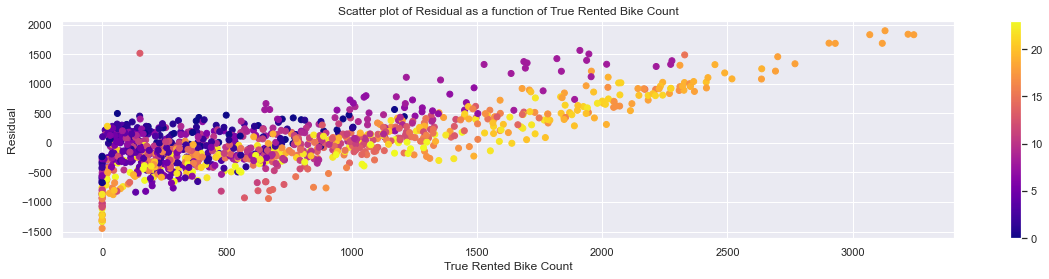

In [7]:
# plot histogram of residual as a function of y_test

plt.scatter(y_test, resid, c=X_test['Hour'], cmap='plasma', label='')
plt.xlabel('True Rented Bike Count') 
plt.ylabel('Residual') 
plt.title("Scatter plot of Residual as a function of True Rented Bike Count")
plt.colorbar()
plt.show()

The scatter plot below plot shows us the residual for each true rented bike count value grouped by month. The different colours correspond to the absoute value of the residue, as shown by the colour bar to the right of the figure. Once again the majority of the residuals are grouped around 0, more so for the colder months 1, 3 and 11 than for warmer ones. This corresponds with the violin plots for warmwer months having higher ranges of values. 

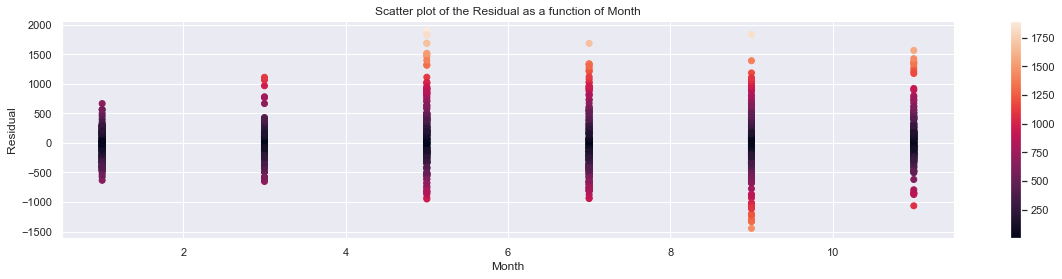

In [8]:
# plot scatter plot of residual as a function of X_test['Month']
plt.scatter(X_test['Month'], resid, c=np.abs(resid))
plt.xlabel('Month') 
plt.ylabel('Residual') 
plt.title("Scatter plot of the Residual as a function of Month")
plt.colorbar()
plt.show()

The scatter plot below shows the residual for each value of rainfall in the test set, with the different colours representing the absolute value of the residual. We can see that most often it doesn't rain, i.e. there is 0mm of rainfall. All of the higher values of residual therefore occur at 0mm rainfall, since there would have been a very large range of rented bike counts at this level of rainfall, making it more difficult for the model to make predictions using the factor.

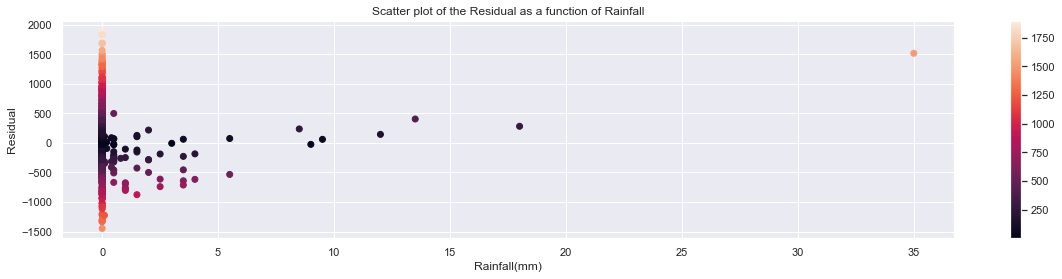

In [9]:
# plot scatter plot of residual as a function of X_test['Rainfall(mm)']
plt.scatter(X_test['Rainfall(mm)'], resid, c=np.abs(resid))
plt.xlabel('Rainfall(mm)') 
plt.ylabel('Residual') 
plt.title("Scatter plot of the Residual as a function of Rainfall")
plt.colorbar()
plt.show()

# Decision Tree Regression

Below we train a decision tree regressor to give a more accurate prediction than the linear regression for the rented bike count. 

The first three performance metrics below are lower than those for the linear regression model of both this notebook and the article, whilst r^2 i higher, suggesting this decision tree gives predictions which are closer to the true (test) values.

The histogram below, which displays true rented bike count against predicted bike count, shows that the distribution of the predicted values now follows that of the true values more closely, but still has points where the model doesn't match such as the 900-1000 class having a much higher frequency.

In [10]:
# Fit regression model
regr = DecisionTreeRegressor(max_depth=8)
regr.fit(X, y)

# Predict & compute residual
y_1 = regr.predict(X_test)
resid_1 = y_test - y_1

# Compute root mean squared error
RMSE = np.sqrt(np.mean(resid_1**2))
print("Root mean squared error is",RMSE)

# Compute mean absolute error 
MAE = np.mean(np.abs(resid_1))
print("Mean absolute error is", MAE)

# Compute coefficient of variation
CV = 100 * RMSE/np.mean(y_test)
print("Coefficient of variation is",round(CV),"%")

# Compute the coefficient of determination
r2 = r2_score(y_test, y_1)
print("R^2 is equal to",r2)


Root mean squared error is 295.6030213165214
Mean absolute error is 179.9603348063678
Coefficient of variation is 41 %
R^2 is equal to 0.7965471453029365


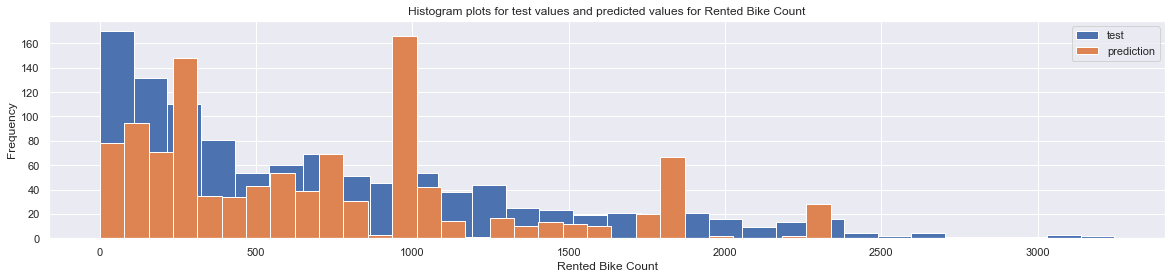

In [11]:
# plot histograms for y_test and y_1
plt.hist(y_test, bins=30, label='test')
plt.hist(y_1, bins=30, label='prediction')
plt.xlabel('Rented Bike Count') 
plt.ylabel('Frequency') 
plt.title("Histogram plots for test values and predicted values for Rented Bike Count")
plt.legend()
plt.show()

# Conclusion
To conclude, whilst hours and months appear to be significant variables when considering hours between roughly 11pm and 7am and colder months, the correlation is less clear for the rest of the values. Without comparing to other variables from the data set, it isn't possible to determine how significant hours and months are. However, it does appear that the hours at which rentals are most common are 8am and 6pm, which corresponds to the results for the linear regression used in the article. In the article, when compared to other variables hours is determined to be the most significant, with seasons (months) also having high significance. 

Rainfall in the article is determined to be a lot less significant in the linear regression model than hours, which correspons to the findings of this notebook that many of the data points for rainfall had a high residual. In this notebook residuals and rented bike count appear to have a positive correlation, which is also seen in Fig. 9 of the article.

Similarly to the article, we can conclude that the decision tree model had better performance metrics than the linear regression model and gives more accurate predictions. Using a more accurate model such as this and a larger data set as used in the article would have reduced the error in the predictions created by the model in this notebook.